# Implementing Polynomial Regression in Python

## 5 steps for Polynomial Regression 

1. Import packages and classes needed.
2. Feed in the data (including transformations if necessary).
3. Create the regression model and fit it with the data.
4. Use the results of the model fitting to verify if the it is satisfactory.
5. Make predictions with the model.

In [2]:
# Step 1: Import Packages and Classes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [3]:
# Step 2: Feed in the Data
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([15,11,2,8,25,32])

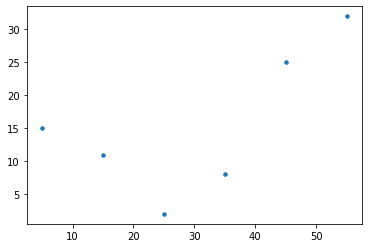

In [5]:
#plotting a graph to understand the points and need for a polynomial regression
plt.scatter(x, y, s=12)
plt.show()

In [6]:
#new step is transformation with the degree of the polynomial observed to fit the data

#from above we have an idea that a polynomial of degree 2 will fit the data
transformer = PolynomialFeatures(degree=2, include_bias=False) #include_bias represents the intercept
transformer.fit(x)
x_ = transformer.transform(x)

#one-liner: x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

print(x_.shape)
print(x_)

print('\n------------------------\n')

#include_bias true
x_transform = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)
print (x_transform.shape)
print (x_transform)

#first column: bias
#second: value of x
#third: value of x^2 (degree:2)

(6, 2)
[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]

------------------------

(6, 3)
[[1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.500e+01 3.025e+03]]


In [7]:
print(y.shape)
print(y)

(6,)
[15 11  2  8 25 32]


In [8]:
# Step 3: Create the model and fit the data
model = LinearRegression(fit_intercept=False).fit(x_transform,y)

In [9]:
# Step 4: Results
r_sq = model.score(x_transform,y)
print("Coefficient of determination: ", r_sq)

#the coefficient of determination measures how well a statistical model predicts an outcome.

Coefficient of determination:  0.8908516262498565


In [10]:
print("Intercept, θ0: ",model.intercept_)
print("Slope, θ1: ", model.coef_)

Intercept, θ0:  0.0
Slope, θ1:  [21.37232143 -1.32357143  0.02839286]


In [11]:
# Step 5: Make Prediction
y_pred = model.predict(x_transform)
print('predicted response: ', y_pred, sep='\n')

predicted response: 
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


In [12]:
#new predictions
x_new_input = np.array([-25, -5, 5, 60, 65, 70, 85, 90]).reshape((-1,1))
x_new_transform = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x_new_input)
print(x_new_transform.shape)
print(x_new_transform)
y_pred_new = model.predict(x_new_transform)
print('New predicted response (y_pred_new):', y_pred_new,sep='\n')

#first column: bias
#second: value of x
#third: value of x^2 (degree:2)

(8, 3)
[[ 1.000e+00 -2.500e+01  6.250e+02]
 [ 1.000e+00 -5.000e+00  2.500e+01]
 [ 1.000e+00  5.000e+00  2.500e+01]
 [ 1.000e+00  6.000e+01  3.600e+03]
 [ 1.000e+00  6.500e+01  4.225e+03]
 [ 1.000e+00  7.000e+01  4.900e+03]
 [ 1.000e+00  8.500e+01  7.225e+03]
 [ 1.000e+00  9.000e+01  8.100e+03]]
New predicted response (y_pred_new):
[ 72.20714286  28.7         15.46428571  44.17232143  55.3
  67.84732143 114.00714286 132.23303571]


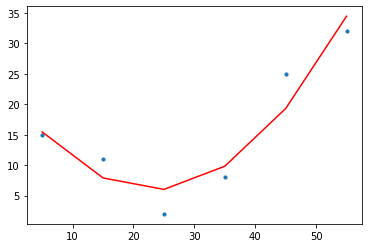

In [13]:
# Step 6: Visualisation

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()